In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

In [54]:
import pandas as pd
movies = pd.read_csv('movies.dat',sep = "::", names = ['MovieID', 'Title', 'Genres'])
#make sure the data files are there in the working directory other-wise you need to specify the complete path

In [55]:
movies.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [56]:
ratings = pd.read_csv('ratings.dat', 
                     sep = "::", names = ['UserID','MovieID', 'Rating', 'Timestamp'])
#complete path needs to be given incase the data file is not there in the working directory

In [57]:
pwd()

'/home/ubuntu/24-Aug'

In [58]:
ratings.head(3)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [59]:
users = pd.read_csv('users.dat', 
                     sep = "::", names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-Code'])
users.head(3)

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [60]:
movies.shape, users.shape, ratings.shape

((3883, 3), (6040, 5), (1000209, 4))

In [61]:
users.Occupation.value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: Occupation, dtype: int64

### Merging the 3 files

In [62]:
movies.head(1)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [63]:
ratings.head(1)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760


In [64]:
movie_ratings = pd.merge(movies, ratings, on = "MovieID",)
movie_ratings.shape

(1000209, 6)

In [65]:
movie_ratings.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496


In [66]:
users.head(2)

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072


In [67]:
combinedData = pd.merge(movie_ratings, users, on = "UserID")

In [68]:
combinedData.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067


In [69]:
combinedData.shape

(1000209, 10)

In [70]:
len(combinedData[:500].MovieID.value_counts())

389

In [71]:
#chose 10 - 20 K rows for your analysis

In [72]:
#users age distribution - do it from users table

In [73]:
combinedData.head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [74]:
#top 25 movies based on viewership
#use nlargest function or use sorting

In [75]:
#shuffling the rows
combinedData=combinedData.iloc[np.random.permutation(combinedData.shape[0]),:]

In [76]:
data5K = combinedData[:5000]

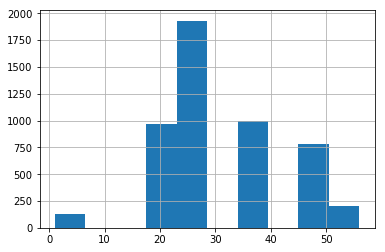

In [77]:
data5K.Age.hist()

In [78]:
data5K.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
645931,1991,Child's Play (1988),Horror,1889,2,989089920,M,18,14,80023
352837,440,Dave (1993),Comedy|Romance,3693,4,966355760,M,25,15,94062
386209,2012,Back to the Future Part III (1990),Comedy|Sci-Fi|Western,3992,4,965595200,M,25,4,32653
489206,2173,"Navigator: A Mediaeval Odyssey, The (1988)",Adventure|Fantasy|Sci-Fi,5070,4,962469721,M,25,2,55344
443971,2253,Toys (1992),Action|Comedy|Fantasy,4543,1,965107070,M,25,2,11105


In [79]:
import re

In [80]:
title = data5K.iloc[0].Title
title

"Child's Play (1988)"

In [81]:
re.search("Toy Story", title)!=None

False

In [82]:
def fn(t):
    return re.search("Toy Story".lower(), t.lower())!=None

In [83]:
fn(title)

False

In [84]:
combinedData["Title"].apply(fn)

645931    False
352837    False
386209    False
489206    False
443971    False
802607    False
378951    False
433325    False
805166    False
351137    False
417146    False
416427    False
590657    False
631899    False
762071    False
180256    False
841800    False
918621    False
815333    False
303397    False
311931    False
536938    False
719465    False
357347    False
472485    False
350575    False
530264    False
641875    False
150096    False
437231    False
          ...  
512815    False
953026    False
857180    False
415313    False
898832    False
513467    False
548103    False
100100    False
561586    False
601841    False
699522    False
295560    False
633464    False
199529    False
150223    False
418812    False
751744    False
69589     False
829800    False
681425    False
102592    False
971804    False
287256    False
955340    False
279761    False
222617    False
887317    False
568397    False
593051    False
897554    False
Name: Title, Length: 100

In [85]:
toystory = combinedData[combinedData["Title"].apply(fn)]
toystory #find out avg, med, most frequent, bar plot

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
234642,1,Toy Story (1995),Animation|Children's|Comedy,2379,4,974330927,M,18,18,13045
437838,1,Toy Story (1995),Animation|Children's|Comedy,4489,5,965011269,M,18,4,78613
496668,1,Toy Story (1995),Animation|Children's|Comedy,5156,5,1041862897,M,18,14,10024
351630,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3686,5,966346115,M,25,7,48070
400439,1,Toy Story (1995),Animation|Children's|Comedy,4092,5,965420852,F,25,0,19063
99138,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1088,4,1018389505,F,1,10,98103
62795,1,Toy Story (1995),Animation|Children's|Comedy,722,5,975524460,M,25,12,55106
121763,1,Toy Story (1995),Animation|Children's|Comedy,1276,4,974798665,M,35,17,94041
553734,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5776,4,958170416,M,18,12,97205
70772,1,Toy Story (1995),Animation|Children's|Comedy,791,5,981400121,M,35,7,27511


#### Top 25 movies according to viewership

In [86]:
top25=data5K.groupby(["MovieID", "Title"]).Timestamp.count().sort_values(ascending = False)[:25]
top25

MovieID  Title                                                
260      Star Wars: Episode IV - A New Hope (1977)                21
356      Forrest Gump (1994)                                      18
1617     L.A. Confidential (1997)                                 17
480      Jurassic Park (1993)                                     17
2858     American Beauty (1999)                                   16
2716     Ghostbusters (1984)                                      16
919      Wizard of Oz, The (1939)                                 15
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    15
608      Fargo (1996)                                             15
2762     Sixth Sense, The (1999)                                  14
1270     Back to the Future (1985)                                14
3793     X-Men (2000)                                             14
1291     Indiana Jones and the Last Crusade (1989)                13
1240     Terminator, The (1984)         

In [87]:
combinedData.loc[combinedData.UserID==2696, "Rating"]

991048    4
991045    4
991036    5
991052    1
991037    4
991049    4
991050    2
991054    1
991047    4
991035    3
991044    2
991053    4
991042    4
991039    4
991038    3
991046    4
991051    4
991043    4
991040    2
991041    3
Name: Rating, dtype: int64

### Feature Engineering

In [88]:
data5K.Genres.head()

645931                      Horror
352837              Comedy|Romance
386209       Comedy|Sci-Fi|Western
489206    Adventure|Fantasy|Sci-Fi
443971       Action|Comedy|Fantasy
Name: Genres, dtype: object

In [89]:
data5K.Genres=data5K.Genres.str.split("|")
data5K.Genres.head()

645931                        [Horror]
352837               [Comedy, Romance]
386209       [Comedy, Sci-Fi, Western]
489206    [Adventure, Fantasy, Sci-Fi]
443971       [Action, Comedy, Fantasy]
Name: Genres, dtype: object

In [90]:
#concatenate all the lists for the rows
x = []
for rn in range(len(data5K)):
    x = x+data5K.iloc[rn].Genres

In [91]:
#print(x)

In [92]:
unique_genres = list(set(x))
print(unique_genres)

['Film-Noir', 'War', 'Mystery', 'Romance', "Children's", 'Action', 'Drama', 'Crime', 'Thriller', 'Adventure', 'Sci-Fi', 'Horror', 'Comedy', 'Fantasy', 'Documentary', 'Animation', 'Western', 'Musical']


In [93]:
unique_genres = pd.Series(unique_genres)

In [94]:
row = data5K.Genres.iloc[0]
row

['Horror']

In [95]:
len(unique_genres)

18

In [96]:
unique_genres.isin(row)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

In [97]:
df = pd.DataFrame()
for row in data5K.Genres:
    a = unique_genres.isin(row) #is in method of series can be applied
    df = df.append(a, ignore_index = True)
df[:4]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [98]:
df.columns = unique_genres
df.head(3)

,Film-Noir,War,Mystery,Romance,Children's,Action,Drama,Crime,Thriller,Adventure,Sci-Fi,Horror,Comedy,Fantasy,Documentary,Animation,Western,Musical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [99]:
data5K.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
645931,1991,Child's Play (1988),[Horror],1889,2,989089920,M,18,14,80023
352837,440,Dave (1993),"[Comedy, Romance]",3693,4,966355760,M,25,15,94062
386209,2012,Back to the Future Part III (1990),"[Comedy, Sci-Fi, Western]",3992,4,965595200,M,25,4,32653


In [102]:
df.head(3)

,Film-Noir,War,Mystery,Romance,Children's,Action,Drama,Crime,Thriller,Adventure,Sci-Fi,Horror,Comedy,Fantasy,Documentary,Animation,Western,Musical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [105]:
data5K.reset_index(inplace=True)

In [108]:
data5K.drop("index", axis=1, inplace = True)

In [109]:
data5K = pd.concat((data5K, df), axis = 1)

In [110]:
data5K.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Thriller,Adventure,Sci-Fi,Horror,Comedy,Fantasy,Documentary,Animation,Western,Musical
0,1991,Child's Play (1988),[Horror],1889,2,989089920,M,18,14,80023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,440,Dave (1993),"[Comedy, Romance]",3693,4,966355760,M,25,15,94062,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2012,Back to the Future Part III (1990),"[Comedy, Sci-Fi, Western]",3992,4,965595200,M,25,4,32653,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [111]:
data5K.Occupation.value_counts()

4     705
0     623
7     522
1     426
17    343
20    311
12    275
2     254
16    232
14    223
6     187
3     174
5     120
15    114
10    110
11     88
13     81
9      72
18     64
19     60
8      16
Name: Occupation, dtype: int64

In [51]:
data5K.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-Code', 'Film-Noir', 'War', 'Mystery',
       'Romance', 'Children's', 'Action', 'Crime', 'Western', 'Thriller',
       'Adventure', 'Horror', 'Sci-Fi', 'Comedy', 'Fantasy', 'Documentary',
       'Animation', 'Drama', 'Musical'],
      dtype='object')

In [ ]:
final_data = data5K.drop(["MovieID", "Title", "Genres", "UserID", "Timestamp", "Zip-Code"], axis = 1)

In [ ]:
final_data.head(3)

In [ ]:
y = final_data.Rating
X = final_data.iloc[:, 1:]